# What is Linear Classification?

Imagine that you have two point clouds that you want to classify, what solution do you propose? The idea that logistic regression proposes is to separate them with a straight line.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [17]:
from jupyterthemes import jtplot
jtplot.style()

In [18]:
np.random.seed(1995)

In [19]:
x = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
y = [2 + np.random.normal() for i in range(20)] + [4 + np.random.normal() for i in range(20)]
z = ['Stark'] * 20 + ['Bolton'] * 20
data = pd.DataFrame({'x' : x, 'y' : y, 'Type' : z})
data.head()

,x,y,Type
0,2.759367,3.450856,Stark
1,2.529421,4.037920,Stark
2,6.101191,2.030075,Stark
3,2.535178,1.790706,Stark
4,4.817922,0.162836,Stark


In [20]:
def linear_classification(line = False, point1 = False, point2 = False, point3 = False):
    
    fig, ax = plt.subplots(figsize = (13, 8))
    
    sns.scatterplot(data = data, x = 'x', y = 'y', hue = 'Type', ax = ax)
    
    if line:
        ax.plot([0, data['x'].max()], [0, data['x'].max()])
        
    if point1:
        ax.plot([4], [2], markersize = 15, marker = '*', color = 'g')
        
    if point2:
        ax.plot([2], [4], markersize = 15, marker = '*', color = 'g')
        
    if point3:
        ax.plot([4], [4], markersize = 15, marker = '*', color = 'g')

In [21]:
interact(linear_classification, line = False, point1 = False, point2 = False, point3 = False);

interactive(children=(Checkbox(value=False, description='line'), Checkbox(value=False, description='point1'), …

We can solve this problem by defining $h$ as follows:

$$h(x, y) = x - y$$

- If $h > 0$ → Stark
- If $h < 0$ → Bolton

# Biological inspiration


This model, strange as it may seem, can be interpreted as a neuron, if we observe a neuron in our brain we will see that it is made up of several denditres and an axon, the neuron connects its axon to the denditres of another neuron, and in turn has several neurons connected to their own denditras.

<img src = https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Blausen_0657_MultipolarNeuron.png/1024px-Blausen_0657_MultipolarNeuron.png>

So a neuron receives information from several more neurons, but only sends a result (through the axon) to another, that is, the neuron has several inputs but only has one output. Like the previous model that receives two inputs ($x$, $y$) and a single output ($Stark$ / $Bolton$ depending on the case).

<hr>

# From linear regression to logistics regression


The first idea that we could have when trying to model the above would be to use the probability that a point is Stark or Bolton and use what we already know, linear regression to model it.

$$P = \alpha + \beta X$$

But something is wrong, here $P \in [0, 1]$ but in the right side $X \in (- \infty, \infty)$, so we still have a proiblem. What if we use the odds ratio?, the odds ratio is defined as follows: 

$$Odds_{P} = \frac{P}{1 - P}$$

if we use the odds ratio instead of probability our model would be as follows:

$$\frac{P}{1 - P} = \alpha + \beta X$$


Notice when the numerator tends to 0 (the probability of success tends to 0) the odds ratio tends to 0. In the other hand when the numerator is bigger than the denominator, the odds ratio is bigger than one, even more so if the denominator tends to 0 (the probability of failure tends to 0 or the probability of success tends to 1) the odds ratio tend to $\infty$. Thus the odds ratio is a real number in the $[0, \infty)$, but in the right side of our equation we still have $X \in (- \infty, \infty)$, the problem still there.


So let's take a look at the function $\ln$.

In [22]:
x = np.linspace(0.00001, 100, 1000)
y = np.log(x) #ln

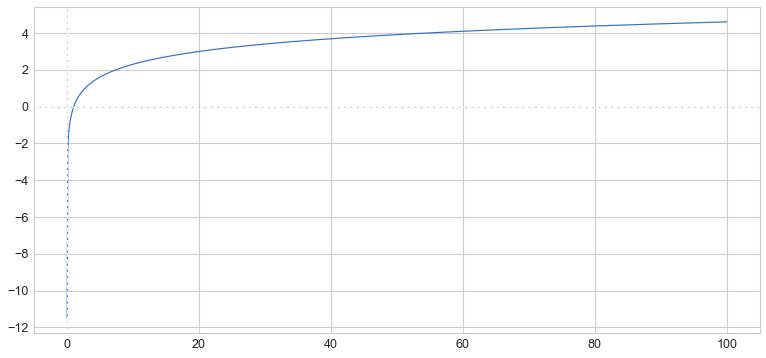

In [23]:
fig, ax = plt.subplots(figsize = (13, 6))

ax.plot(x, y)
ax.axvline(0, color = 'w', linestyle = '--')
ax.axhline(0, color = 'w', linestyle = '--');


$$\ln \left| \frac{P}{1 - P} \right| =  \alpha + \beta X$$

Finally $\ln \left| \frac{P}{1 - P} \right| \in (- \infty, \infty)$ and $X \in (- \infty, \infty)$ and:


Maybe you're thinking that the $\ln$ is not look like a straight line, and you are right, but don't forget the for of the form of the odds.

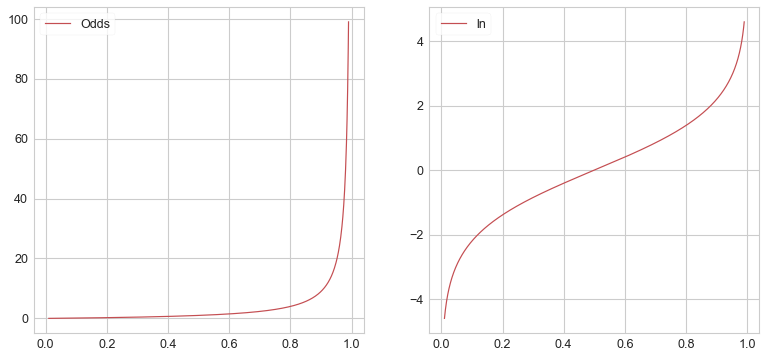

In [24]:
p = np.linspace(0.01, 0.99, 1000)
odds = p / (1 - p)
ln = np.log(odds)

fig, ax = plt.subplots(1, 2, figsize = (13, 6))


ax[0].plot(p, odds, color = 'r', label = 'Odds')
ax[0].legend()

ax[1].plot(p, ln, color = 'r', label = 'ln')
ax[1].legend();

we can solve for P: 

$$\ln \left| \frac{P}{1 - P} \right|=  \alpha + \beta X$$


Apply the exponential function:

$$\frac{P}{1 - P} = e^{\alpha + \beta X}$$


multiply by $(1 - P)$

$$P = e^{\alpha + \beta X} (1 - P)$$
$$P = e^{\alpha + \beta X}  - P e^{\alpha + \beta X}$$


Add $P e^{\alpha + \beta X}$

$$P + P e^{\alpha + \beta X} = e^{\alpha + \beta X}$$

$$P (1 + e^{\alpha + \beta X}) = e^{\alpha + \beta X}$$


Divide by $(1 + e^{\alpha + \beta X})$

$$P = \frac{e^{\alpha + \beta X}}{1 + e^{\alpha + \beta X}}$$

And finally apply a sneaky 1:

$$P = \frac{e^{-(\alpha + \beta X)}}{e^{-(\alpha + \beta X)}}\frac{e^{\alpha + \beta X}}{1 + e^{\alpha + \beta X}}$$

$$P = \frac{1}{1 + e^{-(\alpha + \beta X)}}$$



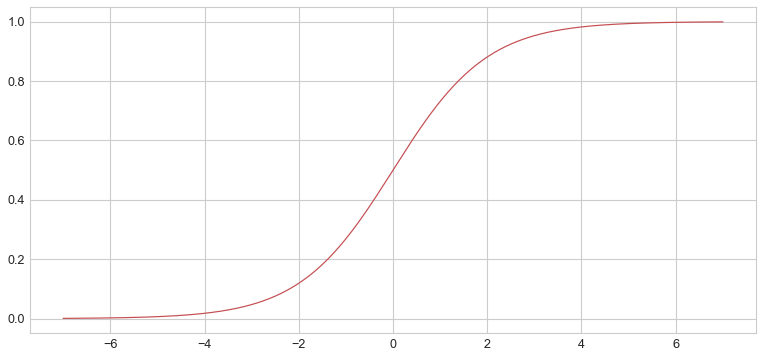

In [25]:
fig, ax = plt.subplots(figsize = (13, 6))

x = np.linspace(-7, 7, 1000)
y = 1 / (1  + np.exp(-x))

ax.plot(x, y, color = 'r')

In the case of multiple predictor variables we would have:

$$\ln \left| \frac{P}{1 - P} \right| =  w_0 + w_1 X_1 + \cdots + w_k X_k$$

And we can define two vectors:

$$\vec{w}
=
\begin{bmatrix}
w_0\\
w_1\\
\vdots \\
w_k \\
\end{bmatrix}
$$


$$\vec{X}
=
\begin{bmatrix}
1\\
X_1\\
\vdots \\
X_k \\
\end{bmatrix}
$$

Thus:

$$\ln \left| \frac{P}{1 - P} \right| = w^T X$$

$$P = \frac{1}{1 + e^{-(w^T X)}}$$

# How we estimate the $\vec{w}$

Every time we fit a statistical or machine learning model, we are estimating parameters.A single variable linear regression has the equation:

$Y = w_0 + w_1 X$

Our goal when we fit this model is to estimate the parameters  $w_0$ and $w_1$ given our observed values of $Y$ and $X$. We use Ordinary Least Squares (OLS) to fit the linear regression model and estimate $w_0$ and $w_1$.

- **Can we use OLS to estimate the $\vec{w}$?**

The answer is **No**. So we need to change cost function, now we will focus on the cross-error entropy function call.

$$j = - \left[y \ln(P) + (1 - y) \ln(1 - P) \right]$$

In [26]:
def j(y, p):
    return - (y * np.log(p) + (1 - y) * np.log(1 - p))

In [27]:
j(1, 0.9) #rigth

0.10536051565782628

In [28]:
j(1, 0.021) #wrong

3.863232841258714

In [29]:
j(0, 0.01) #rigth

0.01005033585350145

In [30]:
j(0, 0.9) #wrong

2.302585092994046

As you can see, this metric is smaller the smaller the error we make with our prediction, so we can reuse the above to build a function to minimize.

$$J = - \frac{1}{n} \sum \left[y_i \ln(P_i) + (1 - y_i) \ln(1 - P_i) \right]$$

To minimize the previous function we can use the descent of the gradient but for this we need to know what the gradient is, but first we must remember that P is a function of $w^T X$ and this in turn of $w_i$.

$$P = \frac{1}{1 + e^{-(w^T X)}}$$


So if we use the chain rule we can express the derivative of $J$ with respect to $w_i$ as:

$$\frac{\partial J}{\partial w_i} = \sum \frac{\partial J}{\partial P_i}\frac{\partial P_i}{\partial \alpha_i}\frac{\partial \alpha_i}{\partial w_i}$$

where $\alpha$ is:


$$\alpha_i = w^T x_i$$

If we calculate each of the individual derivatives we have:

$$
\left \{
\begin{array}{l}
\frac{\partial J}{\partial P_i} = -\left[\frac{y_i}{p_i} - \frac{1 - y_i}{1 - p_i}\right]\\
\frac{\partial P_i}{\partial \alpha_i} = \frac{1}{(1 + e^{-(w^T X)})^2} (e^{-\alpha_i})(- 1)\\
\frac{\partial \alpha_i}{\partial w_i} = x_{ni}
\end{array}
\right.
$$



The second derivative can be simplified

$$\frac{\partial P_i}{\partial \alpha_i} = \frac{1}{(1 + e^{-(w^T X)})^2} (e^{-\alpha_i})(- 1)$$
<hr>
$$\frac{1}{(1 + e^{-(w^T X)})^2} (e^{-\alpha_i})(- 1) = \frac{e^{-\alpha_i}}{(1 + e^{-(w^T X)})^2}$$
<hr>
$$\frac{e^{-\alpha_i}}{(1 + e^{-(w^T X)})^2} = \frac{1}{1 + e^{-(w^T X)}} \frac{e^{-\alpha_i}}{(1 + e^{-(w^T X)})}$$

Finally notice that:

$$1 - P_i = 1 - \frac{1}{1 + e^{-(\vec{\beta} \cdot \vec{X}_{ui})}}$$

$$1 - P_i = \frac{1 + e^{-(\vec{\beta} \cdot \vec{X}_{ui})}}{1 + e^{-(\vec{\beta} \cdot \vec{X}_{ui})}} - \frac{1}{1 + e^{-(\vec{\beta} \cdot \vec{X}_{ui})}}$$

$$1 - P_i = \frac{1 + e^{-(\vec{\beta} \cdot \vec{X}_{ui})} - 1}{1 + e^{-(\vec{\beta} \cdot \vec{X}_{ui})}}$$

<div class="alert alert-danger">$$1 - P_i = \frac{e^{-(\vec{\beta} \cdot \vec{X}_{ui})}}{1 + e^{-(\vec{\beta} \cdot \vec{X}_{ui})}}$$</div>


So.


$$
\left \{
\begin{array}{l}
\frac{\partial J}{\partial P_i} = -\left[\frac{y_i}{p_i} - \frac{1 - y_i}{1 - p_i}\right]\\
\frac{\partial P_i}{\partial \alpha_i} = P_i (1 - P_i)\\
\frac{\partial \alpha_i}{\partial w_i} = x_{ni}
\end{array}
\right.
$$


Putting them all together:

$$\frac{\partial J}{\partial w_i} = - \sum \left[ \frac{y_i}{P_i} P_i(1 - P_i)x_{ni} - \frac{1 - y_i}{1 - p_i} P_i (1 - P_i) x_{ni}\right]$$



$$\frac{\partial J}{\partial w_i} = - \sum \left[ y_i(1 - P_i)x_{ni} - (1 - y_i) P_i  x_{ni}\right]$$

$$\frac{\partial J}{\partial w_i} = - \sum \left[ (y_i - y_iP_i - P_i + y_iP_i)  x_{ni}\right]$$


$$\frac{\partial J}{\partial w_i} = - \sum(y_i  - P_i)  x_{ni}$$

$$\frac{\partial J}{\partial w_i} =  \sum(P_i  - y_i)  x_{ni}$$

<hr>

$$\frac{\partial J}{\partial \vec{w}} =  \sum(P_i  - y_i)  \vec{x_n}$$


<hr>

$$\nabla J =  X^T (P  - y)$$

In [31]:
x = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
y = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
z = [1] * 20 + [0] * 20
data = pd.DataFrame({'x' : x, 'y' : y, 'Type' : z})
data.head()

,x,y,Type
0,3.948864,5.043422,1
1,4.654946,3.221058,1
2,2.346167,3.612457,1
3,3.160796,4.624555,1
4,3.705330,3.836523,1


Precisión del modelo: 1.0


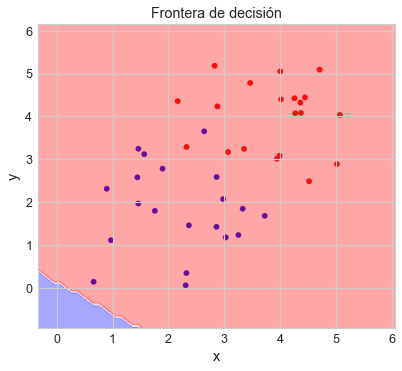

In [89]:
#Ejercicio de tarea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Datos
x = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
y = [4 + np.random.normal() for i in range(20)] + [2 + np.random.normal() for i in range(20)]
z = [1] * 20 + [0] * 20
data = pd.DataFrame({'x': x, 'y': y, 'Type': z})

# Dividimos el conjunto de datos en características (X) y variable objetivo (y)
X = data[['x', 'y']].values
y = data['Type'].values

# Separamos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

# Instanciar y entrenar el modelo
model = LogisticRegressionGD(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Graficar los datos y la frontera de decisión
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', label='Data')
plt.xlabel('x')
plt.ylabel('y')

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))

Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='bwr')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title('Frontera de decisión')
plt.show()

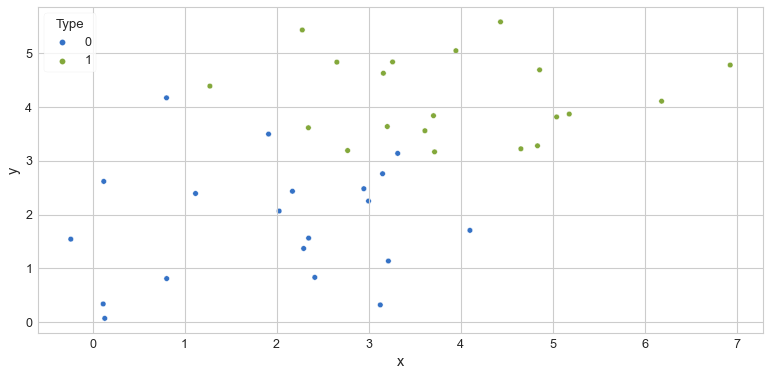

In [32]:
fig, ax = plt.subplots(figsize = (13, 6))

sns.scatterplot(data = data, x = 'x', y = 'y', hue='Type', ax = ax);

### Exercise 

implement logistic regression

$$w^T x_i$$

$$w^T_{1 \times n} x_{n \times 1} = e_{1 \times 1}$$

$$X_{m \times n}$$

$$X_{m \times n} w_{n \times 1} = r_{m \times 1}$$

$$r = 
\begin{bmatrix}
x_1 \cdot w\\
x_2 \cdot w \\ 
\cdots \\ 
x_m \cdot w
\end{bmatrix}
$$

In [33]:
import aztlan as az

In [34]:
az.gradient_des()

TypeError: gradient_des() missing 2 required positional arguments: 'func' and 'x0'

In [35]:
class LogisticRegression:
    
    def _j(self, *w):
        w = np.array(w)
        a = self.y * np.log(self.__sigmoid(self.X @ w))
        b = (1 - self.y) * np.log(1 - self.__sigmoid(self.X @ w))
        return - (a + b).sum() / len(a)
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y, epsilon = 0.0001, max_iter = 10_000, alpha = 0.3, delta = 1e-7,
           orbit = False, verbose = False):
        
        new_col = np.ones(X.shape[0])
        X = np.column_stack([X, new_col])
        
        self.y = y
        self.X = X
        self.w = np.random.random(self.X.shape[1])
        
        if orbit:
            self.w, self.orbit = az.gradient_des(self._j, self.w, epsilon=epsilon, max_iter=max_iter,
                                                alpha=alpha, delta=delta, orbit=orbit, verbose=verbose)
        else:
            self.w = az.gradient_des(self._j, self.w, epsilon=epsilon, max_iter=max_iter,
                                                alpha=alpha, delta=delta, orbit=orbit, verbose=verbose)
            
    def predict(self, X):
        new_col = np.ones(X.shape[0])
        X = np.column_stack([X, new_col])
        return np.round(self.__sigmoid(X @ self.w))

In [36]:
clf = LogisticRegression()

In [37]:
X = data.drop('Type', axis = 1).values

In [38]:
X;

In [39]:
y = data["Type"].values

In [40]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
clf.fit(X, y, orbit=True)

In [42]:
clf._j

<bound method LogisticRegression._j of <__main__.LogisticRegression object at 0x000001D86ABFE100>>

In [43]:
clf.orbit;

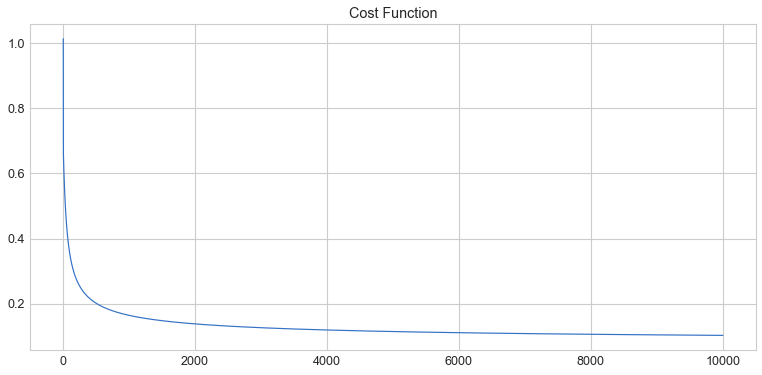

In [44]:
fig, ax = plt.subplots(figsize = (13, 6))

ax.plot([clf._j(*w) for w in clf.orbit])
ax.set_title('Cost Function');

In [45]:
clf.w

array([  2.24534737,   4.21583049, -20.02341589])

$$0 = w_1 x + w_2 y +w_0$$

$$-w_2 y = w_1 x + w_0$$
$$y = \frac{-w_1}{w_2} x - \frac{w_0}{w_2}$$

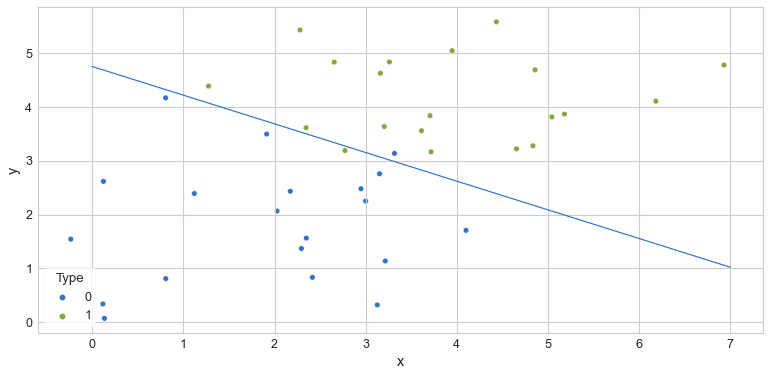

In [46]:
fig, ax = plt.subplots(figsize = (13, 6))

x = np.linspace(0, 7)

sns.scatterplot(data = data, x = 'x', y = 'y', hue='Type', ax = ax)
ax.plot(x, (-clf.w[0] / clf.w[1])*x - (clf.w[2] / clf.w[1]));

In [47]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [48]:
def makeplots(w):
    
    ax.cla()
    x = np.linspace(-2, 10)

    pl = sns.scatterplot(data = data, x = 'x', y = 'y', hue='Type', ax = ax)
    ax.plot(x, (-w[0] / w[1])*x - (w[2] / w[1]))
    
    return (pl,)

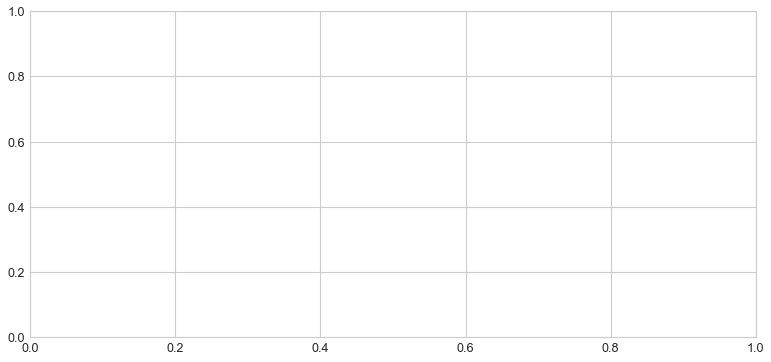

In [49]:
fig, ax = plt.subplots(figsize = (13, 6));

In [50]:
animation = FuncAnimation(fig, makeplots, clf.orbit[:1000:10])
HTML(animation.to_html5_video())

In [51]:
len(clf.orbit[::10])

1001

## Performance Measures

<img src = 'https://geekflare.com/wp-content/uploads/2022/07/basic_cm-edited.jpg'>


True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

False Positives (FP) – When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

False Negatives (FN) – When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

Once you understand these four parameters then we can calculate Accuracy, Precision, Recall and F1 score.


**Accuracy** - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model.


**Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. 

**Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label?

**F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

In [52]:
class Classifier:
    
    def accuracy(self, y_pred, y_real):
        return (y_pred == y_real).mean()
    
    def precision(self, y_pred, y_real, true = 1):
        mask = y_pred == true
        return (y_pred[mask] == y_real[mask]).mean()
    
    def recall(self, y_pred, y_real, true = 1):
        mask = y_real == true
        return (y_pred[mask] == y_real[mask]).mean()
    
    def f1_score(self, y_pred, y_real, true = 1):
        n = self.recall(y_pred, y_real, true = true) * self.precision(y_pred, y_real, true = true)
        d = self.recall(y_pred, y_real, true = true) + self.precision(y_pred, y_real, true = true)
        return 2 * (n / d)
        

In [53]:
class LogisticRegression(Classifier):
    
    def _j(self, *w):
        w = np.array(w)
        a = self.y * np.log(self.__sigmoid(self.X @ w))
        b = (1 - self.y) * np.log(1 - self.__sigmoid(self.X @ w))
        return - (a + b).sum() / len(a)
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y, epsilon = 0.0001, max_iter = 10_000, alpha = 0.3, delta = 1e-7,
           orbit = False, verbose = False):
        
        new_col = np.ones(X.shape[0])
        X = np.column_stack([X, new_col])
        
        self.y = y
        self.X = X
        self.w = np.random.random(self.X.shape[1])
        
        if orbit:
            self.w, self.orbit = az.gradient_des(self._j, self.w, epsilon=epsilon, max_iter=max_iter,
                                                alpha=alpha, delta=delta, orbit=orbit, verbose=verbose)
        else:
            self.w = az.gradient_des(self._j, self.w, epsilon=epsilon, max_iter=max_iter,
                                                alpha=alpha, delta=delta, orbit=orbit, verbose=verbose)
            
    def predict(self, X):
        new_col = np.ones(X.shape[0])
        X = np.column_stack([X, new_col])
        return np.round(self.__sigmoid(X @ self.w))

In [54]:
clf = LogisticRegression()

In [55]:
clf.fit(X, y)

In [56]:
y_pred = clf.predict(X)

In [57]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0.])

In [58]:
clf.accuracy(y_pred, y)

0.95

In [59]:
clf.precision(y_pred, y)

0.95

In [60]:
clf.recall(y_pred, y)

0.95

In [61]:
clf.f1_score(y_pred, y)

0.9500000000000001

#### Confusion matrix
The next way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [63]:
clf = LogisticRegression()

In [64]:
clf

LogisticRegression()

In [65]:
clf.fit(X, y)

LogisticRegression()

In [66]:
y_pred = clf.predict(X)

In [67]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [68]:
clf.predict_proba(X);

In [69]:
confusion_matrix(y, y_pred)

array([[19,  1],
       [ 1, 19]], dtype=int64)

In [70]:
C = ConfusionMatrixDisplay(confusion_matrix(y, y_pred))

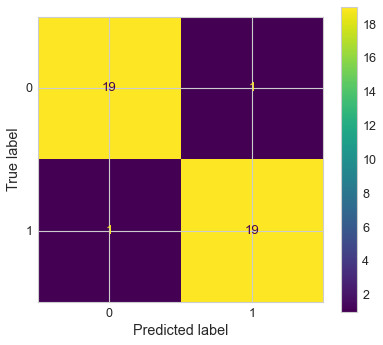

In [71]:
C.plot()

#### Classification report

The final major metric you should consider when evaluating a classification model is a classification report.

A classification report is more so a collection of metrics rather than a single one.

You can create a classification report using Scikit-Learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.

Let's see one.

In [72]:
from sklearn.metrics import classification_report

In [73]:
type(classification_report(y, y_pred))

str

In [74]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



## Cross Validation

Cross-validation is a statistical method used to estimate the skill of machine learning models.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

#### k-Fold Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

<img src= 'sklearn-cross-validation.png' width=600/>


The general procedure is as follows:

- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

[scoring options](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
clf = LogisticRegression()

In [77]:
clf

LogisticRegression()

In [78]:
cross_val_score(clf, X, y, cv = 5, scoring='accuracy').mean()

0.9

In [79]:
cross_val_score(clf, X, y, cv = 5, scoring='precision').mean()

0.9099999999999999

In [80]:
cross_val_score(clf, X, y, cv = 5, scoring='recall').mean()

0.9

In [81]:
cross_val_score(clf, X, y, cv = 5, scoring='f1').mean()

0.8992063492063492